In [1]:
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)

import numpy as np
tmp = np.load('mnist.npz')
X = tmp['X']
y = tmp['y']
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)

# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

# Print out a few rows of y.
print('Rows of y', y[0:5] )
# Print out a few rows of y_oh.
print('Rows of y_oh after np.zeros transformation ', y_oh[0:5] )

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1


The data type of X is  <class 'numpy.ndarray'>
The data type of y is  <class 'numpy.ndarray'>
The shape of X is  (1000, 28, 28, 1)
The shape of y is  (1000,)
The number of unique classes of y is  10
The shape of X_train is  (800, 28, 28, 1)
The shape of y_train is  (800,)
Rows of y [5 0 4 1 9]
Rows of y_oh after np.zeros transformation  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Shape of y_oh after np.zeros transformation  (1000, 10)
Shape of y_oh_train after np.zeros transformation  (800, 10)
Shape of y_oh_test after np.zeros transformation  (200, 10)


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adagrad
import tensorflow
from keras.callbacks import *
from clr_callback import *
import timeit
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


In [24]:
lrlist= [3.16]

#lrlist= [2.3]

# Test two optimal learning rates alternatives

for i in range(len(lrlist)):
    
    adadelta = Adadelta(lr=lrlist[i])
    # Compile the model

    model.compile(loss='categorical_crossentropy', optimizer=adadelta)
    
    # Train the model
    adadelta_hist = model.fit(X_train, y_oh_train, batch_size=32, epochs=20)
    model.reset_states()

    # Evaluate performance
    test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

    predictions = model.predict(X_test, batch_size=32)
    predictions = np.argmax(predictions, axis=1) # change encoding again
    print('Accuracy of Adadelta optimizer when lr =',lrlist[i],'is', (predictions == y_test).sum() / predictions.shape[0]) 
   

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 1.4116
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4277
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.2357
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.1583
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0951
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0656
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0199
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 11/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0164
Epoch 12/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 13/20
800/800 [====

Text(0.5, 0, 'epochs')

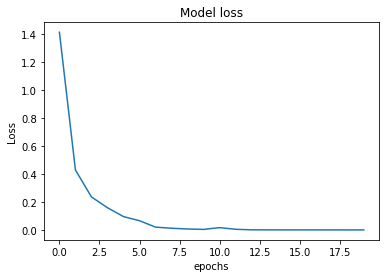

In [25]:
# The loss function curve using adadelta when learning rate is 3.16

plt.plot(adadelta_hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs') 

In [28]:
model.reset_states()
#lrlist= [3.6]

lrlist= [2.3]

# Test two optimal learning rates alternatives

for i in range(len(lrlist)):

    adadelta = Adadelta(lr=lrlist[i])
    # Compile the model

    model.compile(loss='categorical_crossentropy', optimizer=adadelta)
    
    # Train the model
    adadelta_hist = model.fit(X_train, y_oh_train, batch_size=32, epochs=20)
    model.reset_states()

    # Evaluate performance
    test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

    predictions = model.predict(X_test, batch_size=32)
    predictions = np.argmax(predictions, axis=1) 
    print('Accuracy of Adadelta optimizer when lr =',lrlist[i],'is', (predictions == y_test).sum() / predictions.shape[0]) 
   

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 1.6349
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.5062
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.2641
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.1732
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.1038
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0493
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0468
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0335
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 10/20
800/800 [==============================] - 1s 666us/step - loss: 0.0058
Epoch 11/20
800/800 [==============================] - 0s 533us/step - loss: 0.0024
Epoch 12/20
800/800 [==============================] - 0s 539us/step - loss: 0.0016
Epoch 13/20
800/800

Text(0.5, 0, 'epochs')

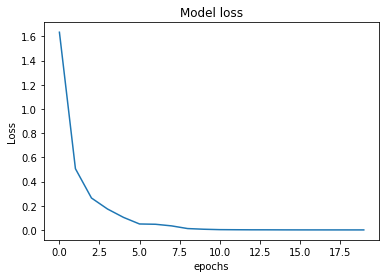

In [29]:
# The loss function curve using adadelta when learning rate is 2.3

plt.plot(adadelta_hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs') 

In [ ]:
# Seems that both 2.3 and 3.15 are good learning rates for adadelta in this network